<a href="https://colab.research.google.com/github/shatakshisingh24/Master-Data-Science-Course/blob/master/Session%20-22%20Deep%20Learning/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [72]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [73]:
x_train.shape

(60000, 28, 28)

In [74]:
x_test.shape

(10000, 28, 28)

In [75]:
y_train.shape

(60000,)

In [42]:
x_test.shape

(10000, 28, 28)

In [43]:
x_test=x_test.reshape(-1,784)
x_train=x_train.reshape(-1, 784)

In [44]:
from keras.models import Sequential

In [45]:
from keras.layers import Dense

In [46]:
model=Sequential()
model.add(Dense(units=64, activation='relu',input_shape= (784, )))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 128, activation='relu'))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 10, activation='softmax'))


In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 71,626
Trainable params: 71,626
Non-trainable params: 0
_________________________________________________________________


In [48]:
#model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'] ) #Adam optimiser optimise the loss function....kind of Gradient Descent


In [49]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [50]:
from keras.utils import to_categorical


In [51]:
y_train.shape

(60000,)

In [52]:
y_train=to_categorical(y_train)
y_train.shape

(60000, 10)

In [53]:
y_test=to_categorical(y_test)
y_test.shape

(10000, 10)

In [54]:
hist=model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7809 - accuracy: 0.8335 - val_loss: 0.2778 - val_accuracy: 0.9217
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2537 - accuracy: 0.9279 - val_loss: 0.2108 - val_accuracy: 0.9402
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1885 - accuracy: 0.9457 - val_loss: 0.2034 - val_accuracy: 0.9429
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1531 - accuracy: 0.9566 - val_loss: 0.1818 - val_accuracy: 0.9484
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1384 - accuracy: 0.9596 - val_loss: 0.1732 - val_accuracy: 0.9530
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1247 - accuracy: 0.9642 - val_loss: 0.1597 - val_accuracy: 0.9600
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1086 - accuracy: 0.9698 - val_loss: 0.1670 - val_accuracy:

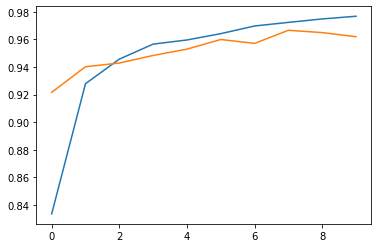

In [84]:
history=hist.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

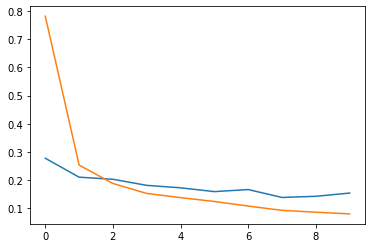

In [85]:
history=hist.history
plt.plot(history['val_loss'])
plt.plot(history['loss'])

In [55]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0954 - accuracy: 0.9736


[0.09541789442300797, 0.9735999703407288]

In [56]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.9602


[0.15700292587280273, 0.9602000117301941]

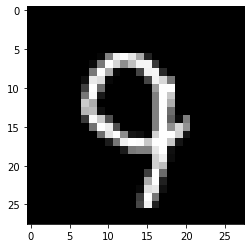

In [66]:
plt.imshow(x_test[999].reshape(28,28), cmap='gray')

In [68]:
model.predict(x_test[999].reshape(-1,784))

array([[1.1182902e-06, 2.0445267e-11, 1.1085021e-05, 7.3818351e-06,
        2.8031252e-04, 4.1466713e-08, 1.2806809e-13, 2.6074271e-03,
        2.7990350e-06, 9.9708980e-01]], dtype=float32)

In [70]:
model.predict_classes(x_test[999].reshape(-1,784))

array([9])